

# *** car resale value  prediction using Machine Learning.***

#  Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#  Loading Train data

In [ ]:
df=pd.read_csv('../input/true-value-cars-dataset/train.csv')


In [ ]:
df.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,2,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,3,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,4,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,5,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


#  Getting information about Data

In [ ]:
df.shape #to know rows and columns

(6399, 30)

In [ ]:
df.columns #column names

Index(['id', 'car_name', 'yr_mfr', 'fuel_type', 'kms_run', 'sale_price',
       'city', 'times_viewed', 'body_type', 'transmission', 'variant',
       'assured_buy', 'registered_city', 'registered_state', 'is_hot', 'rto',
       'source', 'make', 'model', 'car_availability', 'total_owners',
       'broker_quote', 'original_price', 'car_rating', 'ad_created_on',
       'fitness_certificate', 'emi_starts_from', 'booking_down_pymnt',
       'reserved', 'warranty_avail'],
      dtype='object')

**value count**

In [ ]:
df['car_name'].value_counts()

maruti swift           478
maruti swift dzire     332
hyundai i10            330
maruti wagon r 1.0     292
hyundai grand i10      246
                      ... 
isuzu d-max v cross      1
mg zs ev                 1
tata indigo cs           1
nissan evalia            1
fiat linea               1
Name: car_name, Length: 182, dtype: int64

In [ ]:
df['city'].value_counts()

mumbai       1144
bengaluru    1069
new delhi     986
pune          670
chennai       627
hyderabad     549
ahmedabad     354
gurgaon       313
noida         277
ghaziabad     194
faridabad     102
lucknow        91
kolkata        23
Name: city, dtype: int64

In [ ]:
df['sale_price'].value_counts()

300000    20
350000    14
250000    14
150000    13
400000    12
          ..
866699     1
156299     1
309799     1
772199     1
530399     1
Name: sale_price, Length: 4118, dtype: int64

In [ ]:
df.info() #info about each column how many nullvalues and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   6399 non-null   int64  
 1   car_name             6399 non-null   object 
 2   yr_mfr               6399 non-null   int64  
 3   fuel_type            6399 non-null   object 
 4   kms_run              6399 non-null   int64  
 5   sale_price           6399 non-null   int64  
 6   city                 6399 non-null   object 
 7   times_viewed         6399 non-null   int64  
 8   body_type            6309 non-null   object 
 9   transmission         5925 non-null   object 
 10  variant              6399 non-null   object 
 11  assured_buy          6399 non-null   bool   
 12  registered_city      6391 non-null   object 
 13  registered_state     6391 non-null   object 
 14  is_hot               6399 non-null   bool   
 15  rto                  6399 non-null   o

In [ ]:
df.nunique(axis=0) #no of unique values in each column

id                     6399
car_name                182
yr_mfr                   24
fuel_type                 5
kms_run                6243
sale_price             4118
city                     13
times_viewed           2954
body_type                 5
transmission              2
variant                 873
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     26
model                   182
car_availability          4
total_owners              6
broker_quote           5693
original_price         3476
car_rating                4
ad_created_on          6398
fitness_certificate       2
emi_starts_from        4048
booking_down_pymnt     4048
reserved                  2
warranty_avail            2
dtype: int64

In [ ]:
df.duplicated().sum() #no duplicate values

0

**No duplicate records**

In [ ]:
df.isnull().sum() #checking for null values

id                        0
car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type                90
transmission            474
variant                   0
assured_buy               0
registered_city           8
registered_state          8
is_hot                    0
rto                       0
source                  114
make                      0
model                     0
car_availability        542
total_owners              0
broker_quote              0
original_price         2824
car_rating                7
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

**Here original_price column contains more null values so we can decide after correaltion analysis whether to  remove it or not**

#  Correlation

In [ ]:
corr=df.corr() #to find correlation
corr

,id,yr_mfr,kms_run,sale_price,times_viewed,assured_buy,is_hot,total_owners,broker_quote,original_price,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
id,1.000000,0.089709,0.015080,0.032071,0.009603,0.023037,-0.080135,-0.009446,0.008309,-0.000049,0.032071,0.032071,0.004702,0.014275
yr_mfr,0.089709,1.000000,-0.396612,0.521379,0.067565,0.119977,0.204486,-0.295556,0.542951,0.502866,0.521379,0.521379,0.100374,-0.003712
kms_run,0.015080,-0.396612,1.000000,-0.098388,-0.115663,-0.015230,-0.118013,0.136007,-0.121848,-0.082849,-0.098389,-0.098388,-0.081682,0.016345
sale_price,0.032071,0.521379,-0.098388,1.000000,0.098256,0.032198,0.065627,-0.127794,0.961021,0.986196,1.000000,1.000000,0.054197,-0.013129
times_viewed,0.009603,0.067565,-0.115663,0.098256,1.000000,0.079840,0.184748,0.002830,0.131855,0.092438,0.098256,0.098256,0.223501,-0.047353
assured_buy,0.023037,0.119977,-0.015230,0.032198,0.079840,1.000000,0.380024,-0.073470,0.078595,0.009191,0.032197,0.032198,0.071509,-0.027761
is_hot,-0.080135,0.204486,-0.118013,0.065627,0.184748,0.380024,1.000000,-0.125427,0.184548,0.010380,0.065626,0.065628,0.147890,-0.348627
total_owners,-0.009446,-0.295556,0.136007,-0.127794,0.002830,-0.073470,-0.125427,1.000000,-0.150618,-0.080680,-0.127793,-0.127794,-0.056257,0.011473
broker_quote,0.008309,0.542951,-0.121848,0.961021,0.131855,0.078595,0.184548,-0.150618,1.000000,0.985439,0.961020,0.961021,0.085843,-0.061038
original_price,-0.000049,0.502866,-0.082849,0.986196,0.092438,0.009191,0.010380,-0.080680,0.985439,1.000000,0.986196,0.986196,0.080518,-0.004814


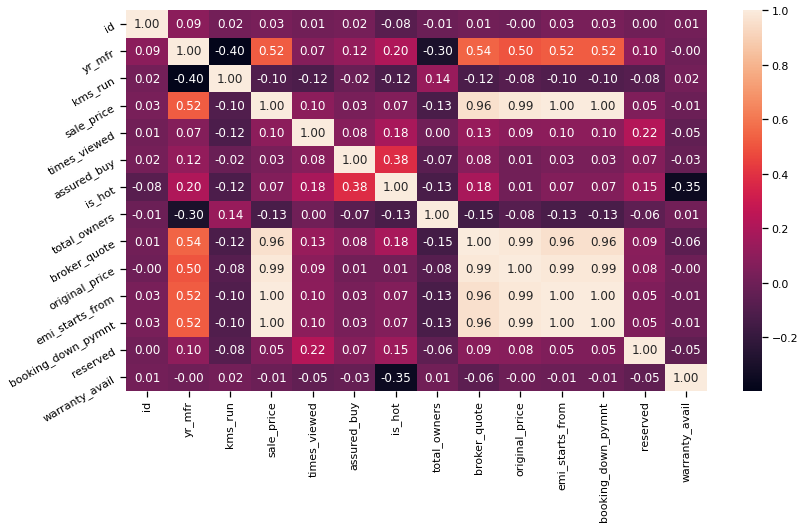

In [ ]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

 **We can observe from above that sale_price,emi_starts_from,booking_down_pymnt
 original_price ,broker_quote are highly correlated and 
 sale_price is our target variable
That means emi_starts_from , booking_down_payment,original_price,broker_qoute effect more our target variable**

 **So we can keep any one of them and drop remaining columns**

 **Here i am removing above mentioned columns and keeping booking_down_payment as it is
 I am removing original_price also because as we observed above it has 2824 null values**

 **And also removing Id column because it doesn't effect our target column**

In [ ]:
def remove(df):
  df1=df.drop(['id','emi_starts_from','original_price','broker_quote'],axis=1)
  return df1
df1=remove(df)

In [ ]:
df1

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6394,toyota fortuner,2012,diesel,116838,1100000,lucknow,327,luxury suv,manual,3.0 mt 4x2,...,toyota,fortuner,NaN,2,good,2019-09-06T04:20:28.916,False,165000,False,True
6395,hyundai i20,2012,diesel,47317,370000,lucknow,214,hatchback,manual,sportz 1.4 crdi 6 speed bs iv,...,hyundai,i20,NaN,1,overpriced,2019-09-02T09:43:11.541,False,55500,False,True
6396,toyota innova,2009,diesel,274167,415000,lucknow,247,suv,manual,2.5 g4 7 str,...,toyota,innova,NaN,2,overpriced,2019-08-28T14:42:16.246,False,62250,False,False
6397,tata indica ev2,2011,diesel,119634,150000,lucknow,157,hatchback,manual,lx,...,tata,indica ev2,NaN,2,overpriced,2019-08-26T06:10:57.269,False,22500,False,False


In [ ]:
df1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,maruti,swift,in_stock,2,great,2021-04-04T07:09:18.583,True,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,maruti,alto 800,in_stock,1,great,2021-03-22T14:07:32.833,True,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-03-20T05:36:31.311,True,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,maruti,swift,in_stock,1,great,2021-01-21T12:59:19.299,True,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,hyundai,grand i10,in_stock,1,great,2021-04-01T13:33:40.733,True,54225,False,False


In [ ]:
df1.isnull().sum()

car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               90
transmission           474
variant                  0
assured_buy              0
registered_city          8
registered_state         8
is_hot                   0
rto                      0
source                 114
make                     0
model                    0
car_availability       542
total_owners             0
car_rating               7
ad_created_on            1
fitness_certificate      8
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

In [ ]:
df1.shape

(6399, 26)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6399 entries, 0 to 6398
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             6399 non-null   object
 1   yr_mfr               6399 non-null   int64 
 2   fuel_type            6399 non-null   object
 3   kms_run              6399 non-null   int64 
 4   sale_price           6399 non-null   int64 
 5   city                 6399 non-null   object
 6   times_viewed         6399 non-null   int64 
 7   body_type            6309 non-null   object
 8   transmission         5925 non-null   object
 9   variant              6399 non-null   object
 10  assured_buy          6399 non-null   bool  
 11  registered_city      6391 non-null   object
 12  registered_state     6391 non-null   object
 13  is_hot               6399 non-null   bool  
 14  rto                  6399 non-null   object
 15  source               6285 non-null   object
 16  make  

<AxesSubplot:>

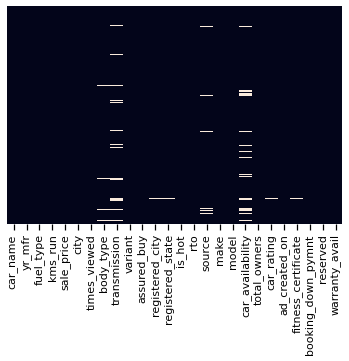

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

# Handling missing values

**In our data body_type,transmission,source,car_availability,car_rating,ad_created_on,fitness_certificate,registered_city,registered_state contains null values our next step is to handle missing data**

In [1]:
df1.dtypes

NameError: ignored

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("_____________________________________________________________________")
  #printing unique values of each column

**Here i am replacing object type column missing values with their mode and numeric type columns with their mean**

In [ ]:
category_columns=df1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df1:
    if df1[column].isnull().any():
        if(column in category_columns):
            df1[column]=df1[column].fillna(df1[column].mode()[0])
        else:
            df1[column]=df1[column].fillna(df1[column].mean)

In [ ]:
df1.head()

In [ ]:
df1.isnull().sum()

In [ ]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df1.describe() #gives statistical description about our numerical data

In [ ]:
df1.describe(include='object') #description about categorical data

In [ ]:
#finding correlation again
corr = df1.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# Handling Outliers

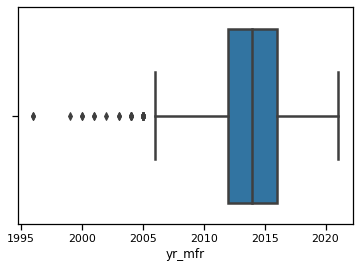

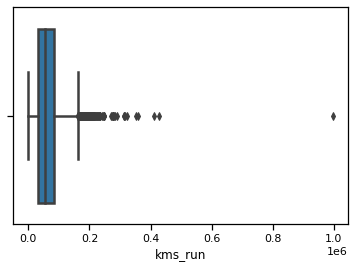

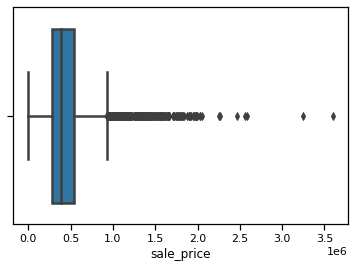

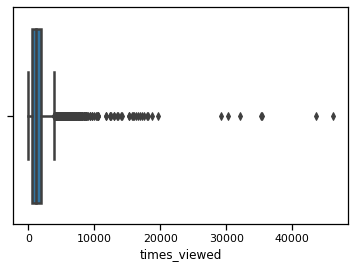

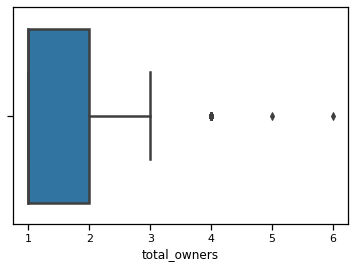

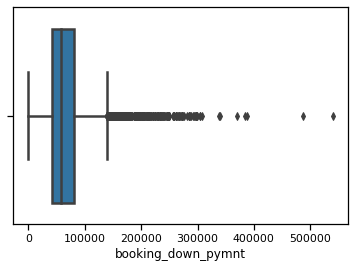

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

**We can observe from above box plots that we have to handle outliers in kms_run,sale_price and times_viewed column .**

**As sales_price and booking_down_payment are highly correlated handling one column will reflect on another**

**Taking kms_run upto max value**

In [ ]:
max_km=df1['kms_run'].max()
max_km

996609

In [ ]:
df1=df1[df1['kms_run']<max_km]
df1.shape

(6398, 26)

**From boxplot observations we can take sales_price < 2500000 only**

In [ ]:
df1=df1[df1['sale_price']<2500000]
df1.shape

(6394, 26)

**From boxplot observations we can take times_viewed < 20000 only**

In [ ]:
df1=df1[df1['times_viewed']<20000]
df1.shape

(6387, 26)

In [ ]:
df1=df1[df1['yr_mfr']>2005]
df1.shape

(6348, 26)

In [ ]:
#  df1=df1[df1['broker_quote']<2500000]
# df1.shape

In [ ]:
# def outlinefree(dataCol):
#     sorted(dataCol)
#         # getting percentile 25 and 27 that will help us for getting IQR (interquartile range)
#     Q1,Q3 = np.percentile(dataCol,[25,75])
#         # getting IQR (interquartile range)
#     IQR = Q3-Q1
#         # getting Lower range error
#     LowerRange = Q1-(1.5 * IQR)
#         # getting upper range error
#     UpperRange = Q3+(1.5 * IQR)
#         # return Lower range and upper range.
#     return LowerRange,UpperRange

In [ ]:
# lwyr_mfr,upyr_mfr = outlinefree(df1['yr_mfr'])
# lwkms_run,upkms_run = outlinefree(df1['kms_run'])
# lwsale_price,upsale_price = outlinefree(df1['sale_price'])
# lwtimes_viewed,uptimes_viewed = outlinefree(df1['times_viewed'])
# lwttl_own,upttl_own = outlinefree(df1['total_owners'])
# lwbdwnpy,updwnpy = outlinefree(df1['booking_down_pymnt'])

In [ ]:
# df1['yr_mfr'].replace(list(df1[df1['yr_mfr'] < lwyr_mfr].yr_mfr) ,lwyr_mfr,inplace=True)
# df1['kms_run'].replace(list(df1[df1['kms_run'] > upkms_run].kms_run) ,upkms_run,inplace=True)
# df1['sale_price'].replace(list(df1[df1['sale_price'] > upsale_price].sale_price) ,upsale_price,inplace=True)
# df1['times_viewed'].replace(list(df1[df1['times_viewed'] > uptimes_viewed].times_viewed) ,uptimes_viewed,inplace=True)
# #df1['total_owners'].replace(list(df1[df1['total_owners'] > upttl_own].total_owners) ,upttl_own,inplace=True)
# df1['booking_down_pymnt'].replace(list(df1[df1['booking_down_pymnt'] > updwnpy].booking_down_pymnt) ,updwnpy,inplace=True)

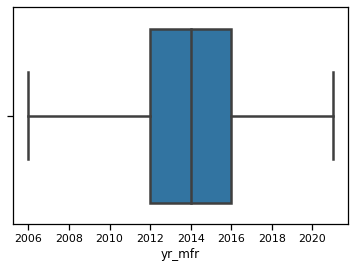

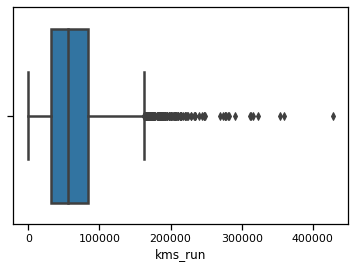

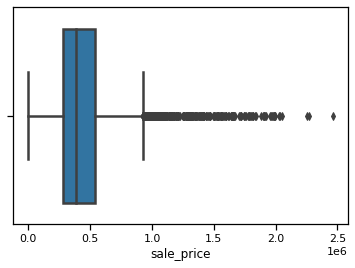

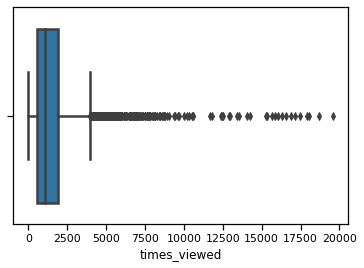

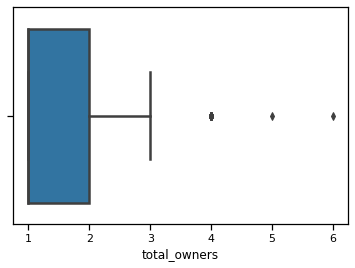

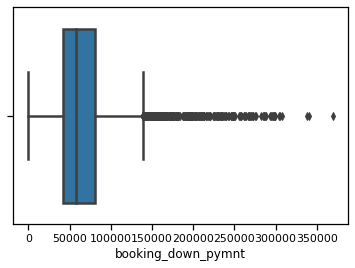

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.boxplot(x=df1[i])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

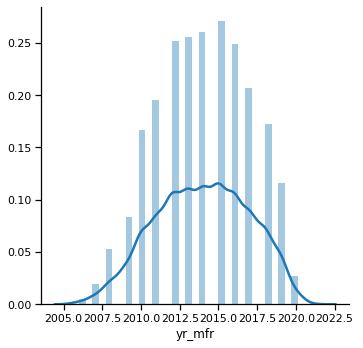

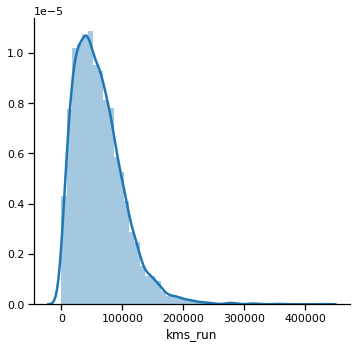

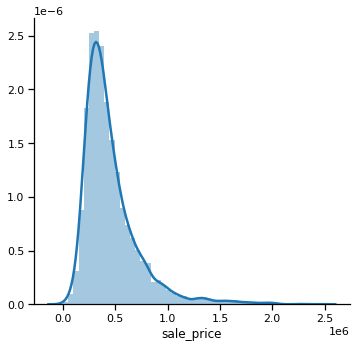

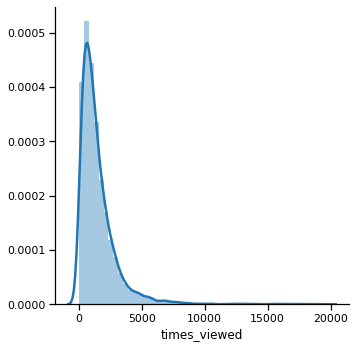

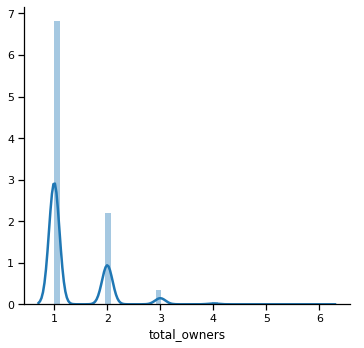

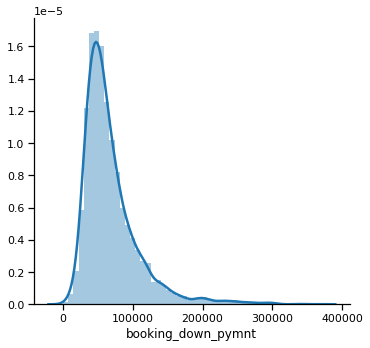

In [ ]:
for col1 in integer_columns:
  sns.FacetGrid(df1,height=5).map(sns.distplot,col1).add_legend()

**We can Observe that there is some skewness in our data**

<Figure size 432x288 with 0 Axes>

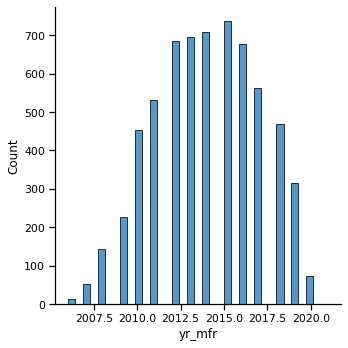

<Figure size 432x288 with 0 Axes>

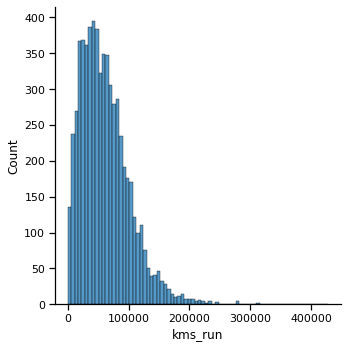

<Figure size 432x288 with 0 Axes>

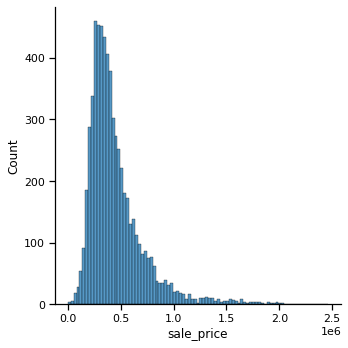

<Figure size 432x288 with 0 Axes>

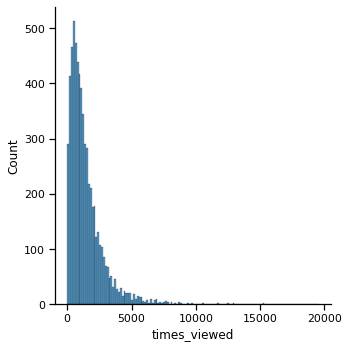

<Figure size 432x288 with 0 Axes>

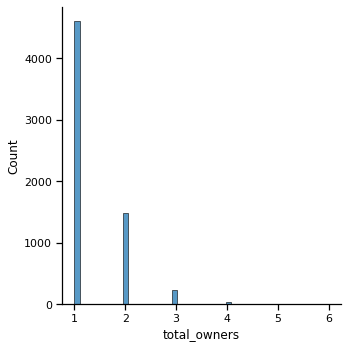

<Figure size 432x288 with 0 Axes>

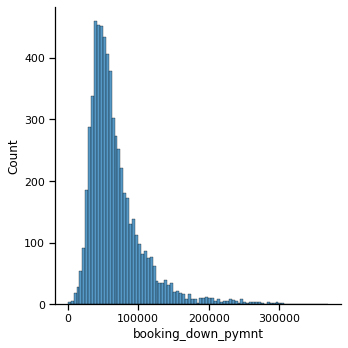

In [ ]:
for i in integer_columns:
  plt.figure()
  sns.displot(df1[i])

# Exploratory Data Analysis

<AxesSubplot:xlabel='kms_run', ylabel='sale_price'>

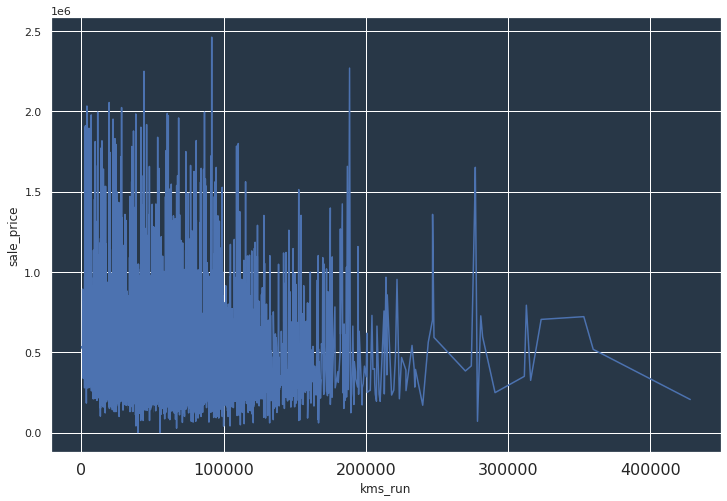

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='kms_run',y='sale_price',data=df1)

**From above graph we can say that there is not much relationship between kms_run and sale_price**

<AxesSubplot:xlabel='times_viewed', ylabel='sale_price'>

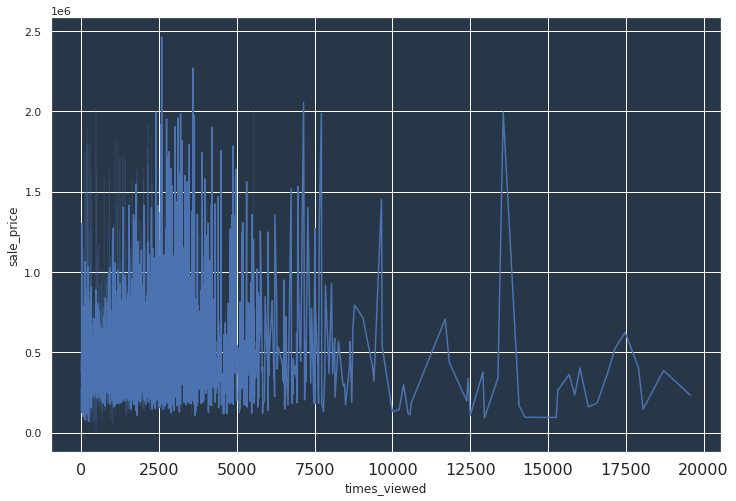

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='times_viewed',y='sale_price',data=df1)



**From above graph we can say that there is not much relationship between times_viewed and sale_price**

<AxesSubplot:xlabel='yr_mfr', ylabel='sale_price'>

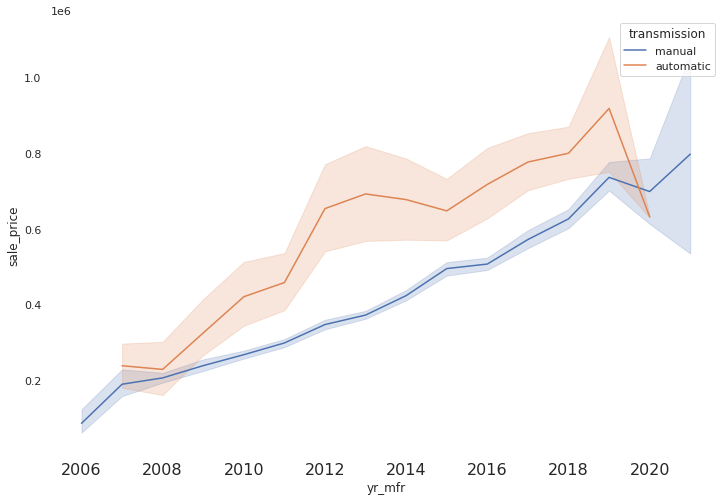

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df1,hue='transmission')

**From the above  figure we can observe the variation in prices of cars of two transmission categories in relation to their manufacturing year. **

<AxesSubplot:xlabel='yr_mfr', ylabel='sale_price'>

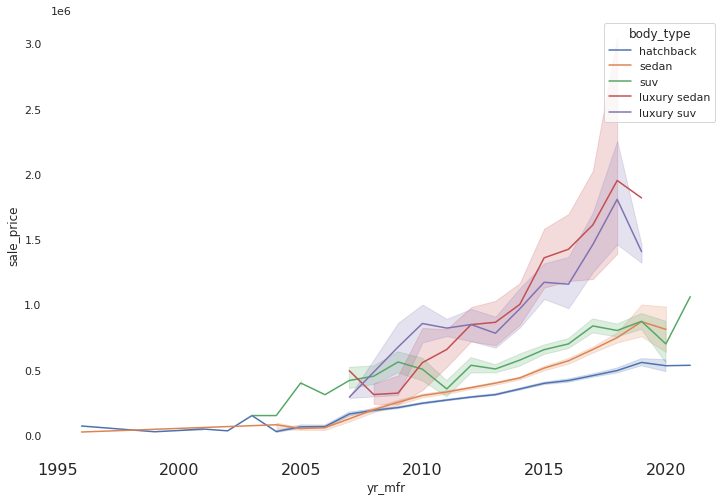

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'white','axes.grid': False,'xtick.labelsize':16})
sns.lineplot(x='yr_mfr',y='sale_price',data=df,hue='body_type')

**From the above  figure we can observe the variation in prices of cars of different body types in relation to their manufacturing year. **

<AxesSubplot:xlabel='total_owners', ylabel='sale_price'>

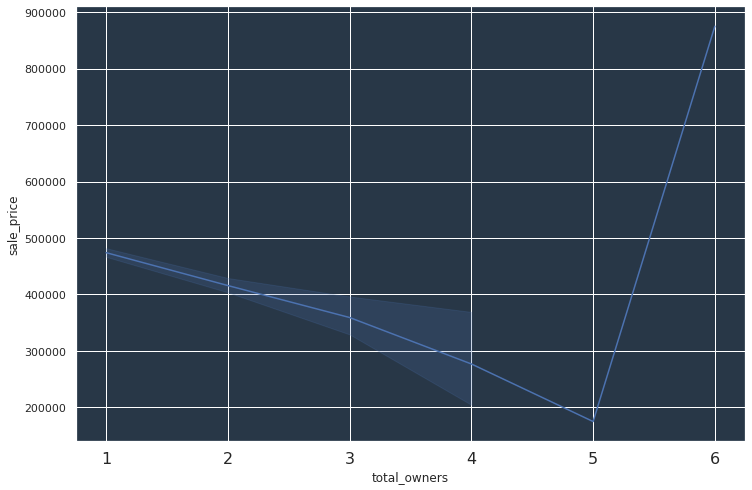

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.lineplot(x='total_owners',y='sale_price',data=df1)

**From the above  figure we can observe the variability in prices of cars of two transmission categories in relation to their total_owners.We can see if total_owners are more the price of that car is generally less**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='body_type', ylabel='count'>

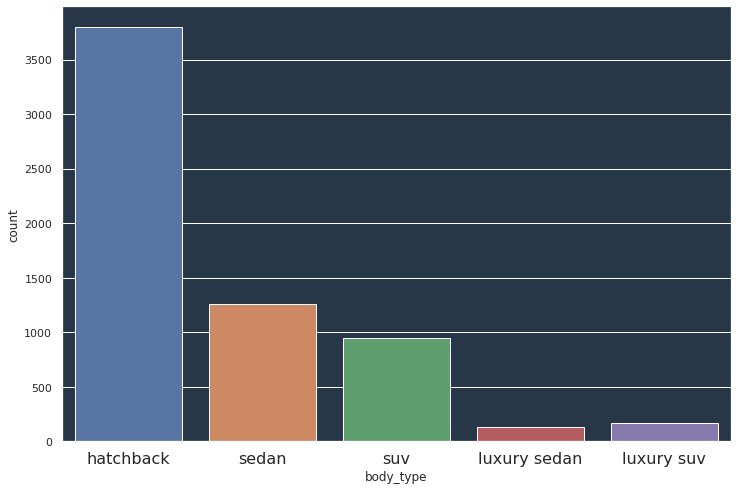

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.countplot(df['body_type'])

**we can observe that the cars with body type 'hatchback' are maximum.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='body_type', ylabel='sale_price'>

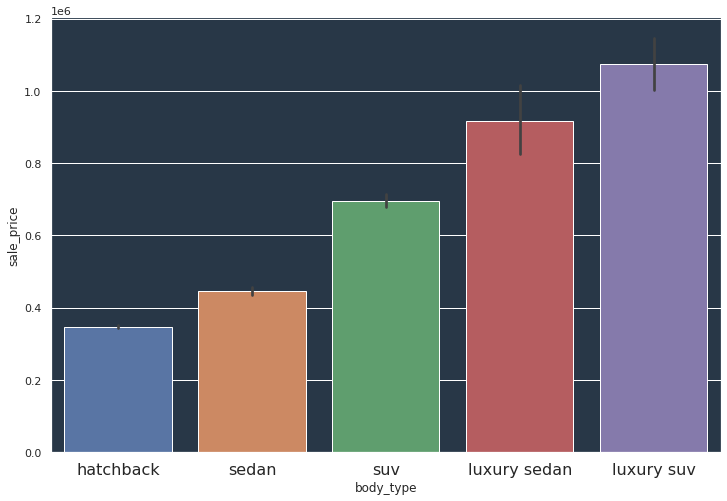

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['body_type'],df['sale_price'])

**We can observe that mean for luxury suv are is highest and around 1.05 . Inter quartile range is 1.0-1.2**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='transmission', ylabel='sale_price'>

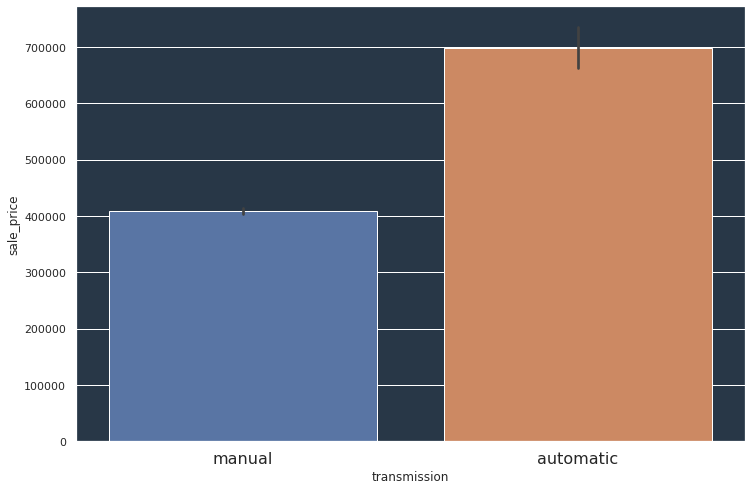

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['transmission'],df['sale_price'])

**We can observe that mean for automatic cars  is more and its value is 700000 . Inter quartile range is 670000-750000**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'noida'),
  Text(1, 0, 'gurgaon'),
  Text(2, 0, 'bengaluru'),
  Text(3, 0, 'new delhi'),
  Text(4, 0, 'mumbai'),
  Text(5, 0, 'pune'),
  Text(6, 0, 'hyderabad'),
  Text(7, 0, 'chennai'),
  Text(8, 0, 'kolkata'),
  Text(9, 0, 'ahmedabad'),
  Text(10, 0, 'faridabad'),
  Text(11, 0, 'ghaziabad'),
  Text(12, 0, 'lucknow')])

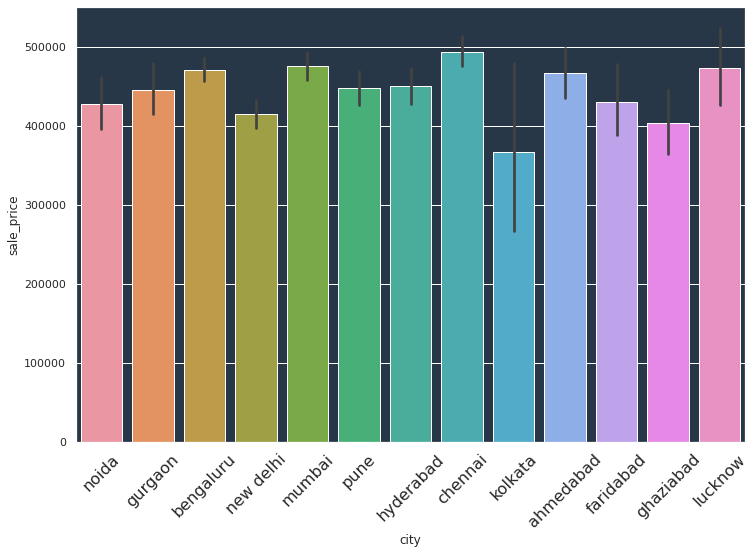

In [ ]:
plt.figure(figsize=(12,8))
sns.set(rc={'axes.facecolor':'#283747','axes.grid': True,'xtick.labelsize':16})
sns.barplot(df['city'],df['sale_price'])
plt.xticks(rotation=45)

**We can observe that mean for cars from chennai  is highest and around 490000 . Inter quartile range is 1.0-1.2 470000-520000**

In [ ]:
#sns.pairplot(df1,kind='kde')

# Loading and Handling Test Data

In [ ]:
df_test=pd.read_csv('../input/true-value-cars-dataset/test.csv')

In [ ]:
df_test.shape

(1000, 30)

In [ ]:
df_test.head()

,id,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,1,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,...,3,363529,365029.0,great,2021-03-16T05:00:49.555,True,8462,54645,False,False
1,2,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,...,1,205738,NaN,great,2021-03-10T12:08:11.905,True,5036,32520,False,False
2,3,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,...,1,382667,NaN,great,2021-03-15T12:03:30.041,True,8998,58110,True,False
3,4,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,...,3,335740,NaN,great,2021-04-09T11:16:26.157,True,8471,54705,True,False
4,5,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,...,1,1119840,1125840.0,great,2021-04-01T07:24:31.712,True,25132,162302,False,False


In [ ]:
df_test.isnull().sum()

id                       0
car_name                 0
yr_mfr                   0
fuel_type                0
kms_run                  0
sale_price               0
city                     0
times_viewed             0
body_type               13
transmission            82
variant                  0
assured_buy              0
registered_city          2
registered_state         2
is_hot                   0
rto                      0
source                  12
make                     0
model                    0
car_availability        78
total_owners             0
broker_quote             0
original_price         455
car_rating               2
ad_created_on            0
fitness_certificate      0
emi_starts_from          0
booking_down_pymnt       0
reserved                 0
warranty_avail           0
dtype: int64

**We removed some columns in train data so we have to remove them in test data also**

In [ ]:
df_test1=remove(df_test)

In [ ]:
df_test1.shape

(1000, 26)

In [ ]:
df_test1.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift dzire,2012,petrol,69029,364299,pune,2068,sedan,manual,vxi 1.2 bs iv,...,maruti,swift dzire,in_stock,3,great,2021-03-16T05:00:49.555,True,54645,False,False
1,hyundai eon,2013,petrol,45721,216799,gurgaon,903,hatchback,manual,era plus,...,hyundai,eon,in_stock,1,great,2021-03-10T12:08:11.905,True,32520,False,False
2,honda amaze,2013,diesel,37395,387399,pune,2809,sedan,manual,1.5 smt i dtec,...,honda,amaze,in_stock,1,great,2021-03-15T12:03:30.041,True,58110,True,False
3,hyundai i20,2012,petrol,37652,364699,bengaluru,1054,hatchback,manual,magna o 1.2,...,hyundai,i20,in_transit,3,great,2021-04-09T11:16:26.157,True,54705,True,False
4,hyundai creta,2017,diesel,53648,1082011,lucknow,2927,suv,automatic,1.6 crdi sx plus auto,...,hyundai,creta,in_stock,1,great,2021-04-01T07:24:31.712,True,162302,False,False


**Handling null values in test data**

In [ ]:
cateogry_columns=df_test1.select_dtypes(include=['object']).columns.tolist()
integer_columns=df_test1.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df_test1:
    if df_test1[column].isnull().any():
        if(column in cateogry_columns):
            df_test1[column]=df_test1[column].fillna(df_test1[column].mode()[0])
        else:
            df_test1[column]=df_test1[column].fillna(df_test1[column].mean)

In [ ]:
df_test1.isnull().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
car_rating             0
ad_created_on          0
fitness_certificate    0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

# Transformation for feature variables

**For Training Data**

**Standard Scaler for numerical data**

In [ ]:
X_train=df1.drop('sale_price',axis=1)
Y_train=df1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_train.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_train[num_d.columns] = sc.fit_transform(num_d)



In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,0.349191,petrol,-1.310500,noida,10.828115,hatchback,manual,lxi opt,0.445437,...,maruti,swift,in_stock,1.191763,great,2021-04-04T07:09:18.583,0.121268,-0.255921,-0.520941,-0.171318
1,maruti alto 800,0.684490,petrol,-0.945148,noida,0.738056,hatchback,manual,lxi,0.445437,...,maruti,alto 800,in_stock,-0.564345,great,2021-03-22T14:07:32.833,0.121268,-0.704714,-0.520941,-0.171318
2,hyundai grand i10,1.019789,petrol,-0.937909,noida,-0.562284,hatchback,manual,sports 1.2 vtvt,0.445437,...,hyundai,grand i10,in_stock,-0.564345,great,2021-03-20T05:36:31.311,0.121268,0.082993,-0.520941,-0.171318
3,maruti swift,-0.321407,diesel,-0.556015,noida,3.150636,hatchback,manual,vdi,0.445437,...,maruti,swift,in_stock,-0.564345,great,2021-01-21T12:59:19.299,0.121268,-0.546950,-0.520941,-0.171318
4,hyundai grand i10,0.349191,petrol,-0.969147,noida,1.083429,hatchback,manual,magna 1.2 vtvt,-2.244986,...,hyundai,grand i10,in_stock,-0.564345,great,2021-04-01T13:33:40.733,0.121268,-0.348353,-0.520941,-0.171318


In [ ]:
X_train.nunique()

car_name                176
yr_mfr                   16
fuel_type                 5
kms_run                6193
city                     13
times_viewed           2945
body_type                 5
transmission              2
variant                 853
assured_buy               2
registered_city         230
registered_state         16
is_hot                    2
rto                     255
source                    3
make                     25
model                   176
car_availability          4
total_owners              6
car_rating                4
ad_created_on          6347
fitness_certificate       2
booking_down_pymnt     4024
reserved                  2
warranty_avail            2
dtype: int64

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_train[i]= label_encoder.fit_transform(X_train[i])
  


In [ ]:
X_train.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,99,0.349191,2,-1.310500,11,10.828115,0,1,503,0.445437,...,13,143,0,1.191763,2,5154,1,-0.255921,-0.520941,-0.171318
1,82,0.684490,2,-0.945148,11,0.738056,0,1,492,0.445437,...,13,10,0,-0.564345,2,4057,1,-0.704714,-0.520941,-0.171318
2,46,1.019789,2,-0.937909,11,-0.562284,0,1,600,0.445437,...,7,69,0,-0.564345,2,3768,1,0.082993,-0.520941,-0.171318
3,99,-0.321407,0,-0.556015,11,3.150636,0,1,677,0.445437,...,13,143,0,-0.564345,2,1014,1,-0.546950,-0.520941,-0.171318
4,46,0.349191,2,-0.969147,11,1.083429,0,1,517,-2.244986,...,7,69,0,-0.564345,2,4986,1,-0.348353,-0.520941,-0.171318


In [ ]:
X_train1=X_train.values

In [ ]:
X_train1

array([[ 9.90000000e+01,  3.49190547e-01,  2.00000000e+00, ...,
        -2.55921460e-01, -5.20941390e-01, -1.71317731e-01],
       [ 8.20000000e+01,  6.84489532e-01,  2.00000000e+00, ...,
        -7.04714172e-01, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  1.01978852e+00,  2.00000000e+00, ...,
         8.29931357e-02, -5.20941390e-01, -1.71317731e-01],
       ...,
       [ 1.65000000e+02, -1.66260337e+00,  0.00000000e+00, ...,
        -1.49755442e-01, -5.20941390e-01, -1.71317731e-01],
       [ 1.44000000e+02, -9.92005395e-01,  0.00000000e+00, ...,
        -1.13346155e+00, -5.20941390e-01, -1.71317731e-01],
       [ 4.60000000e+01,  3.49190547e-01,  0.00000000e+00, ...,
        -3.91041847e-01, -5.20941390e-01,  5.83710743e+00]])

**FOr Testing data**

In [ ]:
X_test=df_test1.drop('sale_price',axis=1)
Y_test=df_test1['sale_price'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# get numeric data
num_d = X_test.select_dtypes(exclude=['object'])

# update the cols with their normalized values
X_test[num_d.columns] = sc.fit_transform(num_d)



In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in categorical_column 
for i in category_columns:
  X_test[i]= label_encoder.fit_transform(X_test[i])
  


In [ ]:
X_test.head()

,car_name,yr_mfr,fuel_type,kms_run,city,times_viewed,body_type,transmission,variant,assured_buy,...,make,model,car_availability,total_owners,car_rating,ad_created_on,fitness_certificate,booking_down_pymnt,reserved,warranty_avail
0,75,-0.589528,2,0.104385,12,0.155016,3,1,304,0.444528,...,12,92,0,2.724196,2,530,1,-0.295997,-0.517134,-0.172818
1,29,-0.265077,2,-0.399505,5,-0.276043,0,1,153,0.444528,...,6,36,0,-0.550078,2,457,1,-0.769566,-0.517134,-0.172818
2,18,-0.265077,0,-0.579503,12,0.429192,3,1,44,0.444528,...,5,10,0,-0.550078,2,520,1,-0.221832,1.933736,-0.172818
3,34,-0.589528,2,-0.573947,1,-0.220172,0,1,217,0.444528,...,6,52,1,2.724196,2,885,1,-0.294713,1.933736,-0.172818
4,27,1.032728,0,-0.228133,8,0.472853,4,0,55,0.444528,...,6,28,0,-0.550078,2,762,1,2.008320,-0.517134,-0.172818


In [ ]:
X_test1=X_test.values
X_test1

array([[75.        , -0.58952782,  2.        , ..., -0.29599737,
        -0.51713356, -0.17281816],
       [29.        , -0.26507662,  2.        , ..., -0.7695663 ,
        -0.51713356, -0.17281816],
       [18.        , -0.26507662,  0.        , ..., -0.22183165,
         1.93373641, -0.17281816],
       ...,
       [68.        ,  1.35717934,  2.        , ...,  0.34067192,
        -0.51713356, -0.17281816],
       [18.        ,  0.38382576,  2.        , ..., -0.17977231,
         1.93373641, -0.17281816],
       [60.        ,  0.70827695,  2.        , ..., -0.55349044,
        -0.51713356, -0.17281816]])

In [ ]:
Y_test

array([ 364299,  216799,  387399,  364699, 1082011,  695999,  286399,
        283299,  346399,  205299, 1211594,  715299,  499099,  203899,
        224999,  307999,  157399,  383999,  620299,  188399,  450000,
        210099, 1155236,  242299,  270799,  387899,  417399,  651999,
        305099,  830699,  504899,   89099,  802199, 1389758,  397799,
        394099,  564299,  546199,  288499,  349299,  570399,  541499,
        240899,  443099,  694399,  180000,  416299,  141399,  500000,
        237199,  560999,  616799,  465599,  386799,  382799,  377299,
        626999,  336699,  567199,  520499,  249599,  487499,  419199,
       1248358,  340199,  410599,  366799,  571799,  438299, 1447530,
        415699,  401799,  182199,   89000,  312499, 1490758,  639499,
        102499,  673999,  111000,  267899,  491499,  371899,  726099,
       1112008,  595999,  509099,  444499,  367999, 1367538,  227099,
        328099,  302799,  450399,  359899, 1129683,  200000,  493399,
        490999,  234

In [ ]:
Y_train

array([386399, 265499, 477699, ..., 415000, 150000, 350000])

# **Training our Models**

#  Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 0)
regressor.fit(X_train1, Y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
y_pred4=regressor.predict(X_test1)

In [ ]:
tsc4=regressor.score(X_train1,Y_train)
tsc4

0.9999242076965718

In [ ]:
sc4=regressor.score(X_test1,Y_test)
sc4

0.9442546464297783

# E) XGBOOST Regressor

In [ ]:
y_pred5=xgb.predict(X_test1)

In [ ]:
tsc5=regressor.score(X_train1,Y_train)
tsc5

0.9999242076965718

In [ ]:
sc5=regressor.score(X_test1,Y_test)
sc5

0.9442546464297783

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def metric(y_test,y_predict):
    mae=mean_absolute_error(y_test,y_predict) #mean_absolute_error
    mse=mean_squared_error(y_test,y_predict) #mean_squared_error
    rmse=mean_squared_error(y_test,y_predict,squared=False)
    return [mae,mse,rmse]

In [ ]:
RandomForestRegressor=metric(Y_test,y_pred4)
RandomForestRegressor.append(sc4)
RandomForestRegressor.append(tsc4)
RandomForestRegressor

[28538.73115,
 5407857878.173094,
 73538.13893601805,
 0.9442546464297783,
 0.9999242076965718]